In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns when displaying DataFrames
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ratings.csv to ratings (1).csv
Saving movies.csv to movies (1).csv
Saving links.csv to links (1).csv
Saving tags.csv to tags (1).csv


In [ ]:
import os
os.listdir()


['.config',
 'movies.csv',
 'ratings (1).csv',
 'links (1).csv',
 'tags.csv',
 'links.csv',
 'tags (1).csv',
 'ratings.csv',
 'movies (1).csv',
 'sample_data']

In [ ]:
#to load the datasets

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

In [ ]:
movies.head()
ratings.head()
links.head()
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


#Data Inspection and Cleaning

In [ ]:
movies.shape
ratings.shape
links.shape
tags.shape

movies.info()
ratings.info()
links.info()
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   i

In [ ]:
#checking for missing values

print("Missing values: \n")
print("Movies:", movies.isnull().sum())
print("Ratings:", ratings.isnull().sum())
print("Links:", links.isnull().sum())
print("Tags:", tags.isnull().sum())

Missing values: 

Movies: movieId    0
title      0
genres     0
dtype: int64
Ratings: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Links: movieId    0
imdbId     0
tmdbId     8
dtype: int64
Tags: userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [ ]:
#to remove duplicates if there are any

movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
links.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)

In [ ]:
#to convert timestamp columns to datetime

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')


#Merging Datasets

Ratings and movies will be merged first (main datasets).

In [ ]:
df = pd.merge(ratings, movies, on='movieId', how='left')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
#confirming merged dataset

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


#Feature Engineering

Here, features that are meaningful to both analysis and potential recommendation system will be created.



In [ ]:
#extract release year from movie title
df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)
df['release_year'] = df['release_year'].astype('Int64')

#count the number of genres per movie
df['genre_count'] = df['genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

#average rating per movie
movie_avg_rating = df.groupby('movieId')['rating'].mean().reset_index(name='avg_rating')
df = df.merge(movie_avg_rating, on='movieId', how='left')

#rating count per movie
movie_rating_count = df.groupby('movieId')['rating'].count().reset_index(name='rating_count')
df = df.merge(movie_rating_count, on='movieId', how='left')

#frequency of rating per user
user_rating_count = df.groupby('userId')['rating'].count().reset_index(name='user_rating_count')
df = df.merge(user_rating_count, on='userId', how='left')

#create a decade column
df['decade'] = (df['release_year'] // 10 * 10).astype('Int64')

df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,genre_count,avg_rating,rating_count,user_rating_count,decade
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,3.920930,215,232,1990
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995,2,3.259615,52,232,1990
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995,3,3.946078,102,232,1990
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,2,3.975369,203,232,1990
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,3,4.237745,204,232,1990


#Exploratory Data Analysis

Distribution of ratings

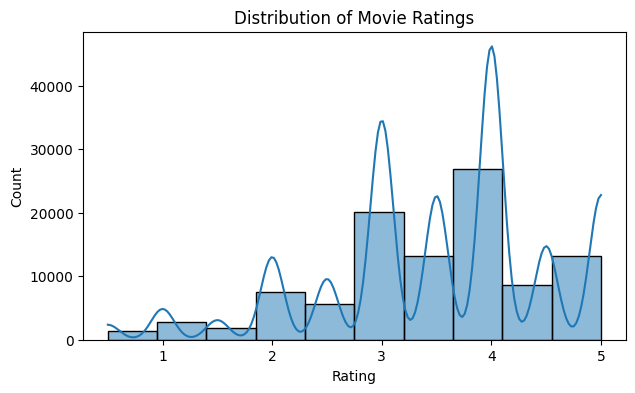

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Average rating by genre

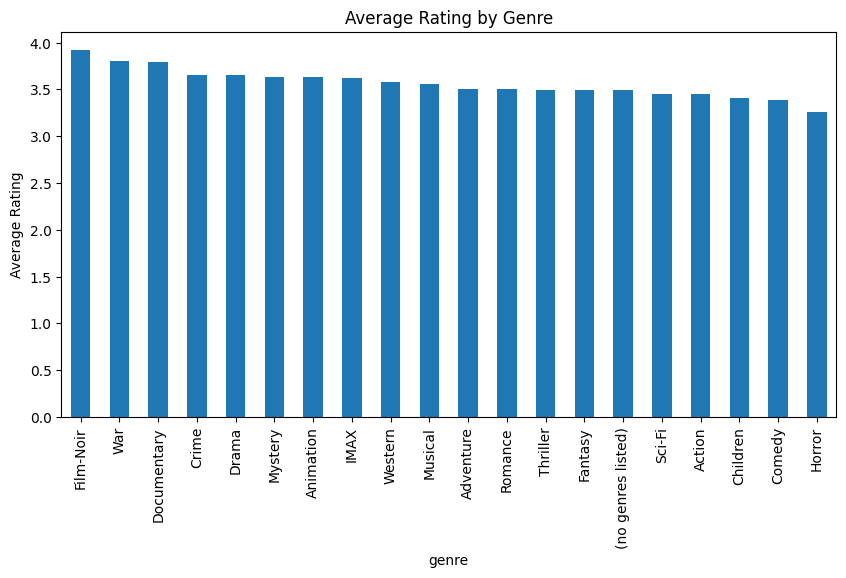

In [ ]:
genre_df = df.assign(genre=df['genres'].str.split('|')).explode('genre')
genre_avg = genre_df.groupby('genre')['rating'].mean().sort_values(ascending=False)
genre_avg.plot(kind='bar', figsize=(10,5), title='Average Rating by Genre')
plt.ylabel('Average Rating')
plt.show()


Number of ratings per year

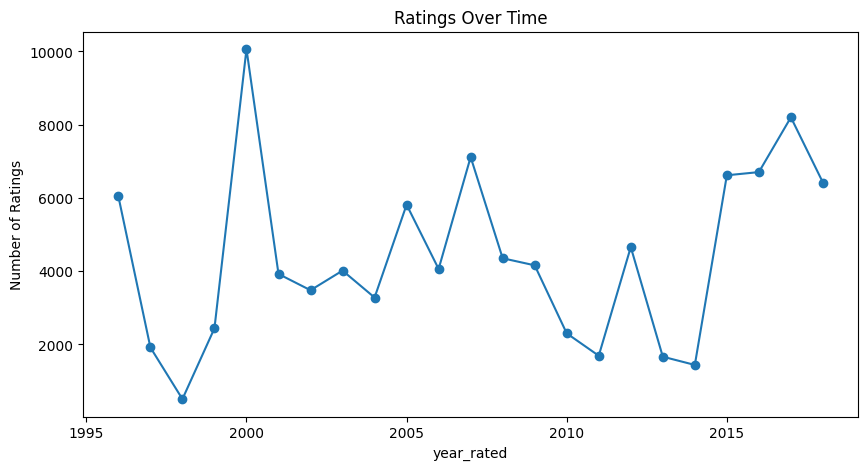

In [ ]:
df['year_rated'] = df['timestamp'].dt.year
rating_trend = df.groupby('year_rated')['rating'].count()
rating_trend.plot(kind='line', figsize=(10,5), marker='o', title='Ratings Over Time')
plt.ylabel('Number of Ratings')
plt.show()


Most rated movies

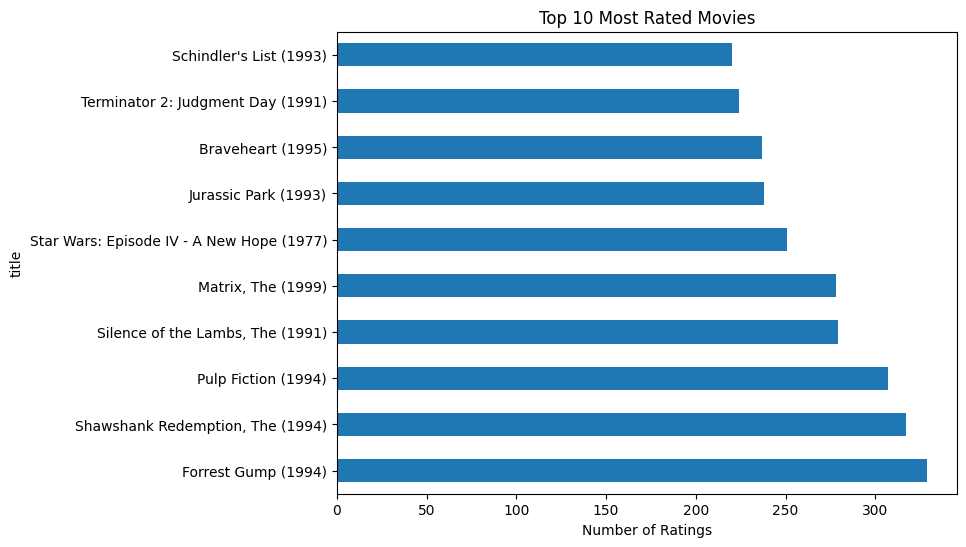

In [ ]:
top_movies = df.groupby('title')['rating_count'].max().sort_values(ascending=False).head(10)
top_movies.plot(kind='barh', figsize=(8,6), title='Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.show()


Top 3 Highest Rated Movies:


,title,mean,count
7593,"Shawshank Redemption, The (1994)",4.429022,317
3499,"Godfather, The (1972)",4.289062,192
3011,Fight Club (1999),4.272936,218


/tmp/ipython-input-332441480.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='title', data=top_3, palette='viridis')


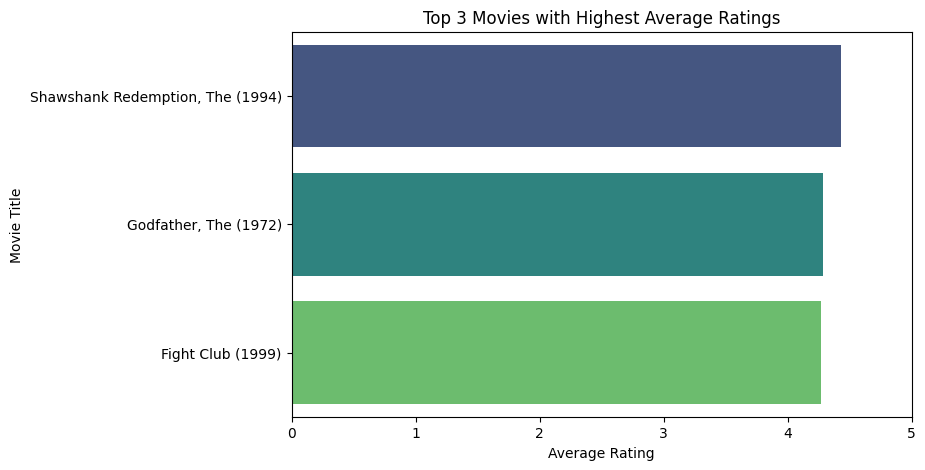

In [ ]:
# Top 3 Movies with Highest Average Ratings

# Group by movie title and compute average rating & count
top_rated_movies = (
    df.groupby('title')['rating']
    .agg(['mean', 'count'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
)

# Filter movies with at least 50 ratings (optional, prevents rare movies with few ratings)
top_rated_filtered = top_rated_movies[top_rated_movies['count'] >= 50]

# Get the top 3
top_3 = top_rated_filtered.head(3)

# Display top 3 movies
print("Top 3 Highest Rated Movies:")
display(top_3)

# Plot the results
plt.figure(figsize=(8,5))
sns.barplot(x='mean', y='title', data=top_3, palette='viridis')
plt.title('Top 3 Movies with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.xlim(0, 5)
plt.show()


Ratings vs genre count

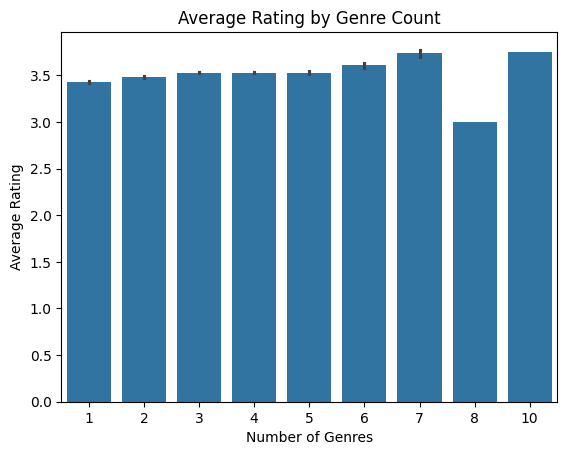

In [ ]:
sns.barplot(data=df, x='genre_count', y='avg_rating')
plt.title('Average Rating by Genre Count')
plt.xlabel('Number of Genres')
plt.ylabel('Average Rating')
plt.show()

Top 3 movies with highest average ratings


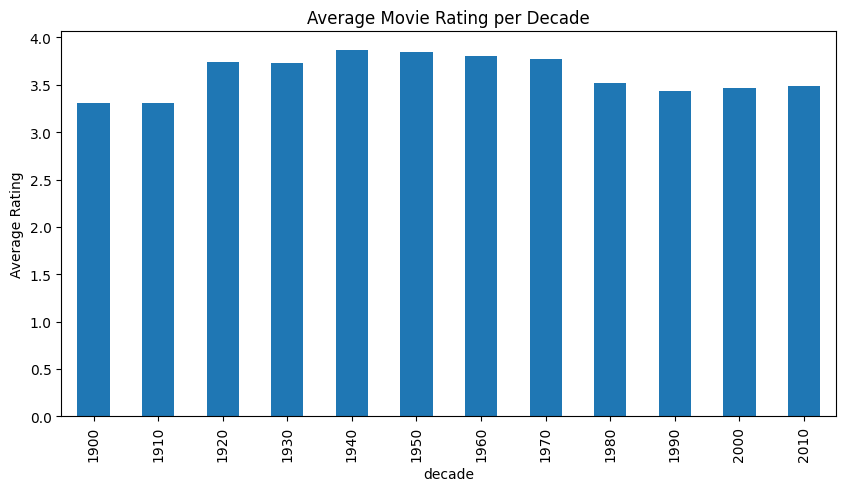

In [ ]:
decade_avg = df.groupby('decade')['rating'].mean()
decade_avg.plot(kind='bar', figsize=(10,5), title='Average Movie Rating per Decade')
plt.ylabel('Average Rating')
plt.show()


#Insights

1. Most users tend to rate movies on the higher end of the scale.
The average rating is approximately 3.5, with the majority of ratings falling between 3 to 5.
This suggests that users are generally generous when rating movies, and low ratings are relatively rare.

2. The movies with the highest number of ratings include Forest Gump (1994), Shawshank Redemption, The (1994), Pulp Fiction (1994), each with an average of at least 300 ratings.
These movies are well known and widely viewed films.

3. The movies with the highest average ratings include Shawshank Redemption The (1994), God Father The (1972) and Fight Club (1999), each with an average rating of around 4.2.
These movies are likely popular classics or audience favorites.

4. Concerning movie ratings over time. There was a sharp rise around the year 2000, showing that it was a period of high user activity. Afterward, the number of ratings varied across the years but remained relatively steady, with noticeable increases around 2005 and again after 2015. This trend suggests that engagement patterns were changing, possibly because of the rise of online movie platforms and evolving viewing habits.  There is a growing user base and engagement over time.

5. Movies with genres such as Film Noir, War and Documentary appear most frequently in the dataset.
This shows that these genres of movies are generally dominant in the movie industry and may also influence rating behaviors.

6. Movies with more genres tend to have higher average ratings compared to single or lower count genre movies.
This may indicate that multi-genre films appeal to a wider audience, although too many genres could also dilute focus.

7. Movies released between the 1940s and 1960s received the highest average ratings, typically around 3.8 to 3.9, suggesting that classic films from those decades are highly appreciated by viewers. On the contrary, movies from the 1980s to the 2010s have slightly lower average ratings, hovering around 3.4 to 3.5. This pattern indicates that all though modern films receive consistent ratings, older classics continue to enjoy strong audience approval.



Exporting the cleaned dataset

In [ ]:
# Save final dataset
df.to_csv('Cleaned_MovieLens_Featured.csv', index=False)
